# Optimize ClickToRate using Thompson Sampling


In [32]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Load the data


In [33]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Random Selecting


In [34]:
import random

In [35]:
N = 10000  # No of rounds
d = 10  # No of Ads
total_reward = 0
ads_selected = []
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = data.values[n, ad]
    total_reward = total_reward + reward

In [36]:
total_reward

1236

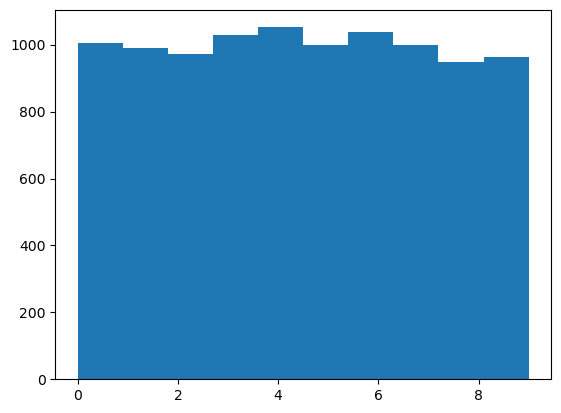

In [37]:
plt.hist(ads_selected)
plt.show()

## Thompson Sampling


Refer the below steps in notion


At each round we consider two number for each ad i

- number of times the ad i got reward 1 upto n rounds
- number of times the ad i got reward 0 upto n rounds


In [38]:
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d


ads_selected = []


total_reward = 0

On each round we take a random draw from the distribution


### Algorithm


In [39]:
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(
            numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1
        )
        if max_random < random_beta:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = data.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

In [40]:
total_reward

2604

(array([  77.,   61.,   33.,  148., 9144.,   47.,   45.,  384.,   35.,
          26.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

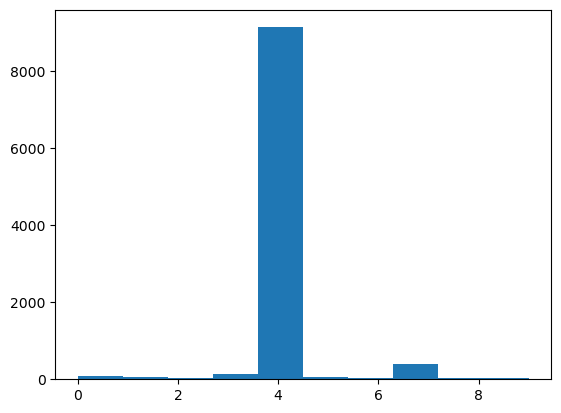

In [41]:
plt.hist(ads_selected)

In [42]:
import thompson

In [59]:
thomp_data = thompson.thompson(data)

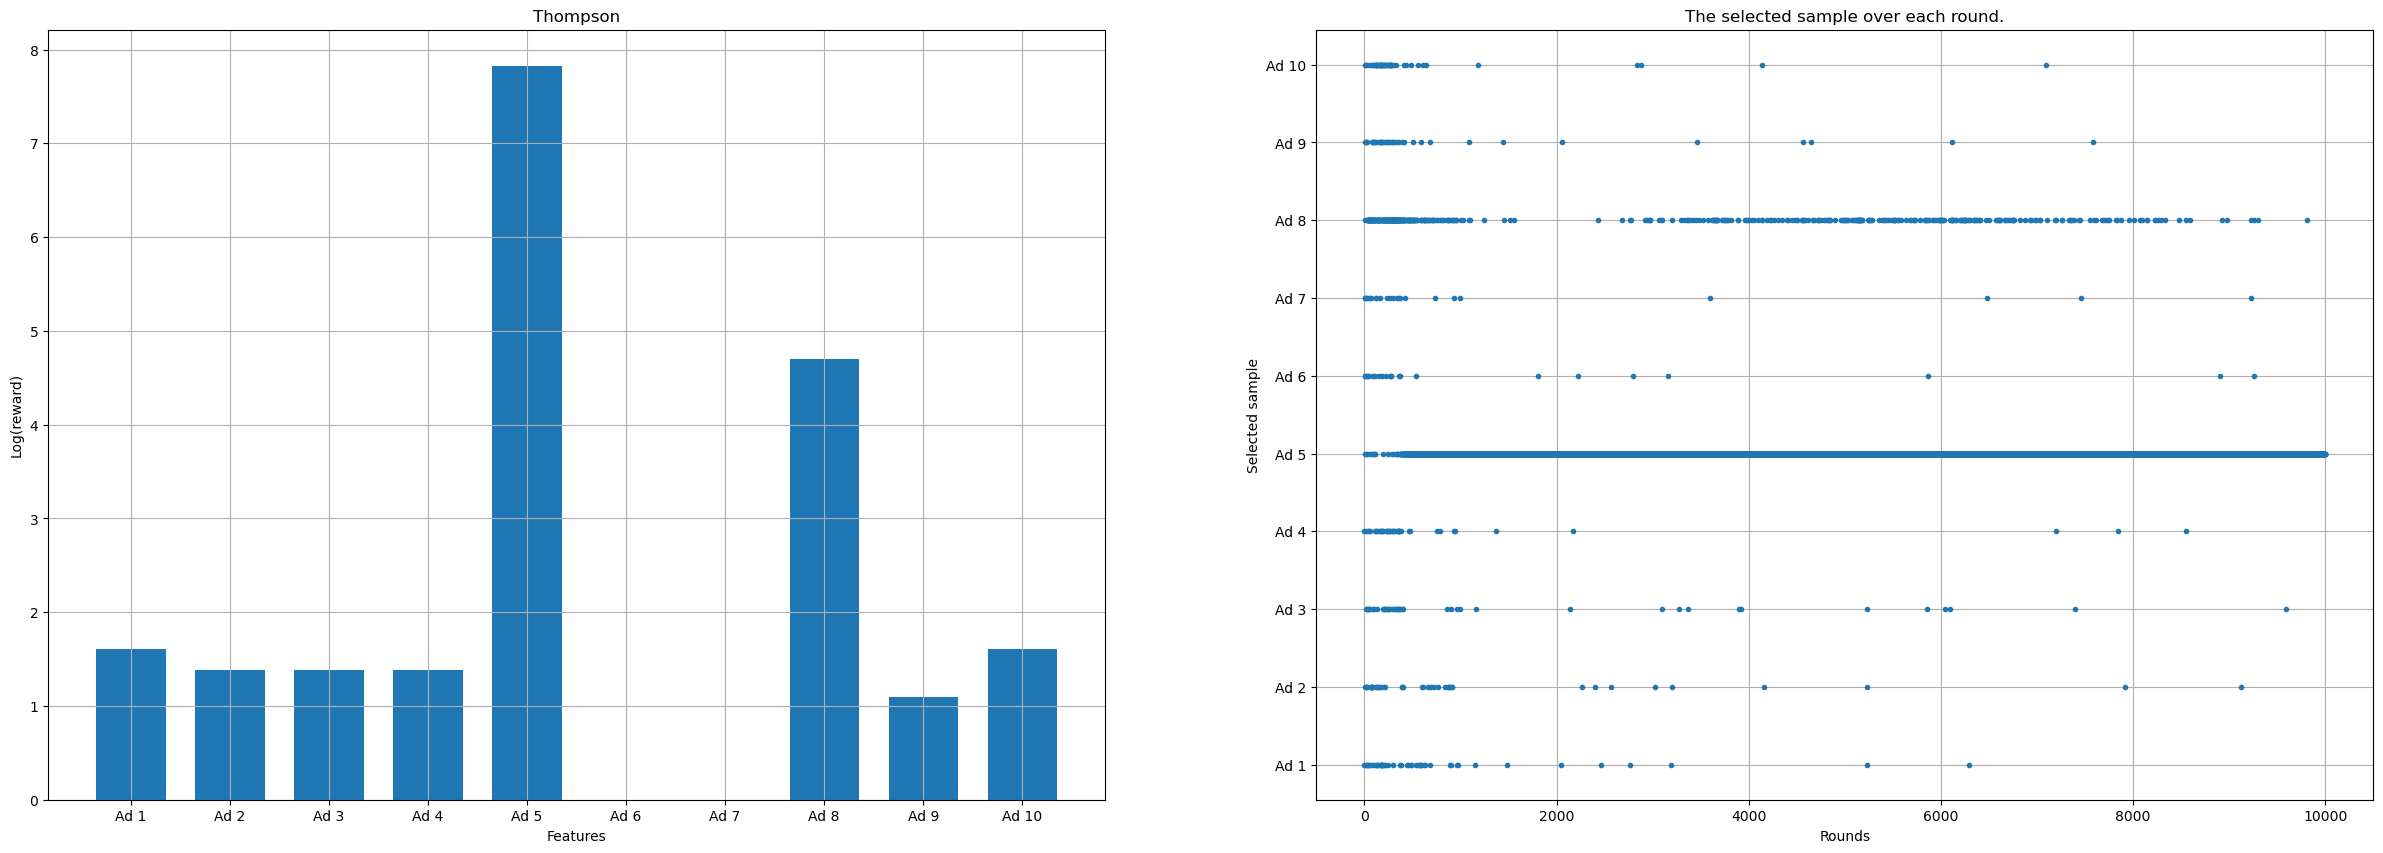

In [60]:
thompson.plot(thomp_data)

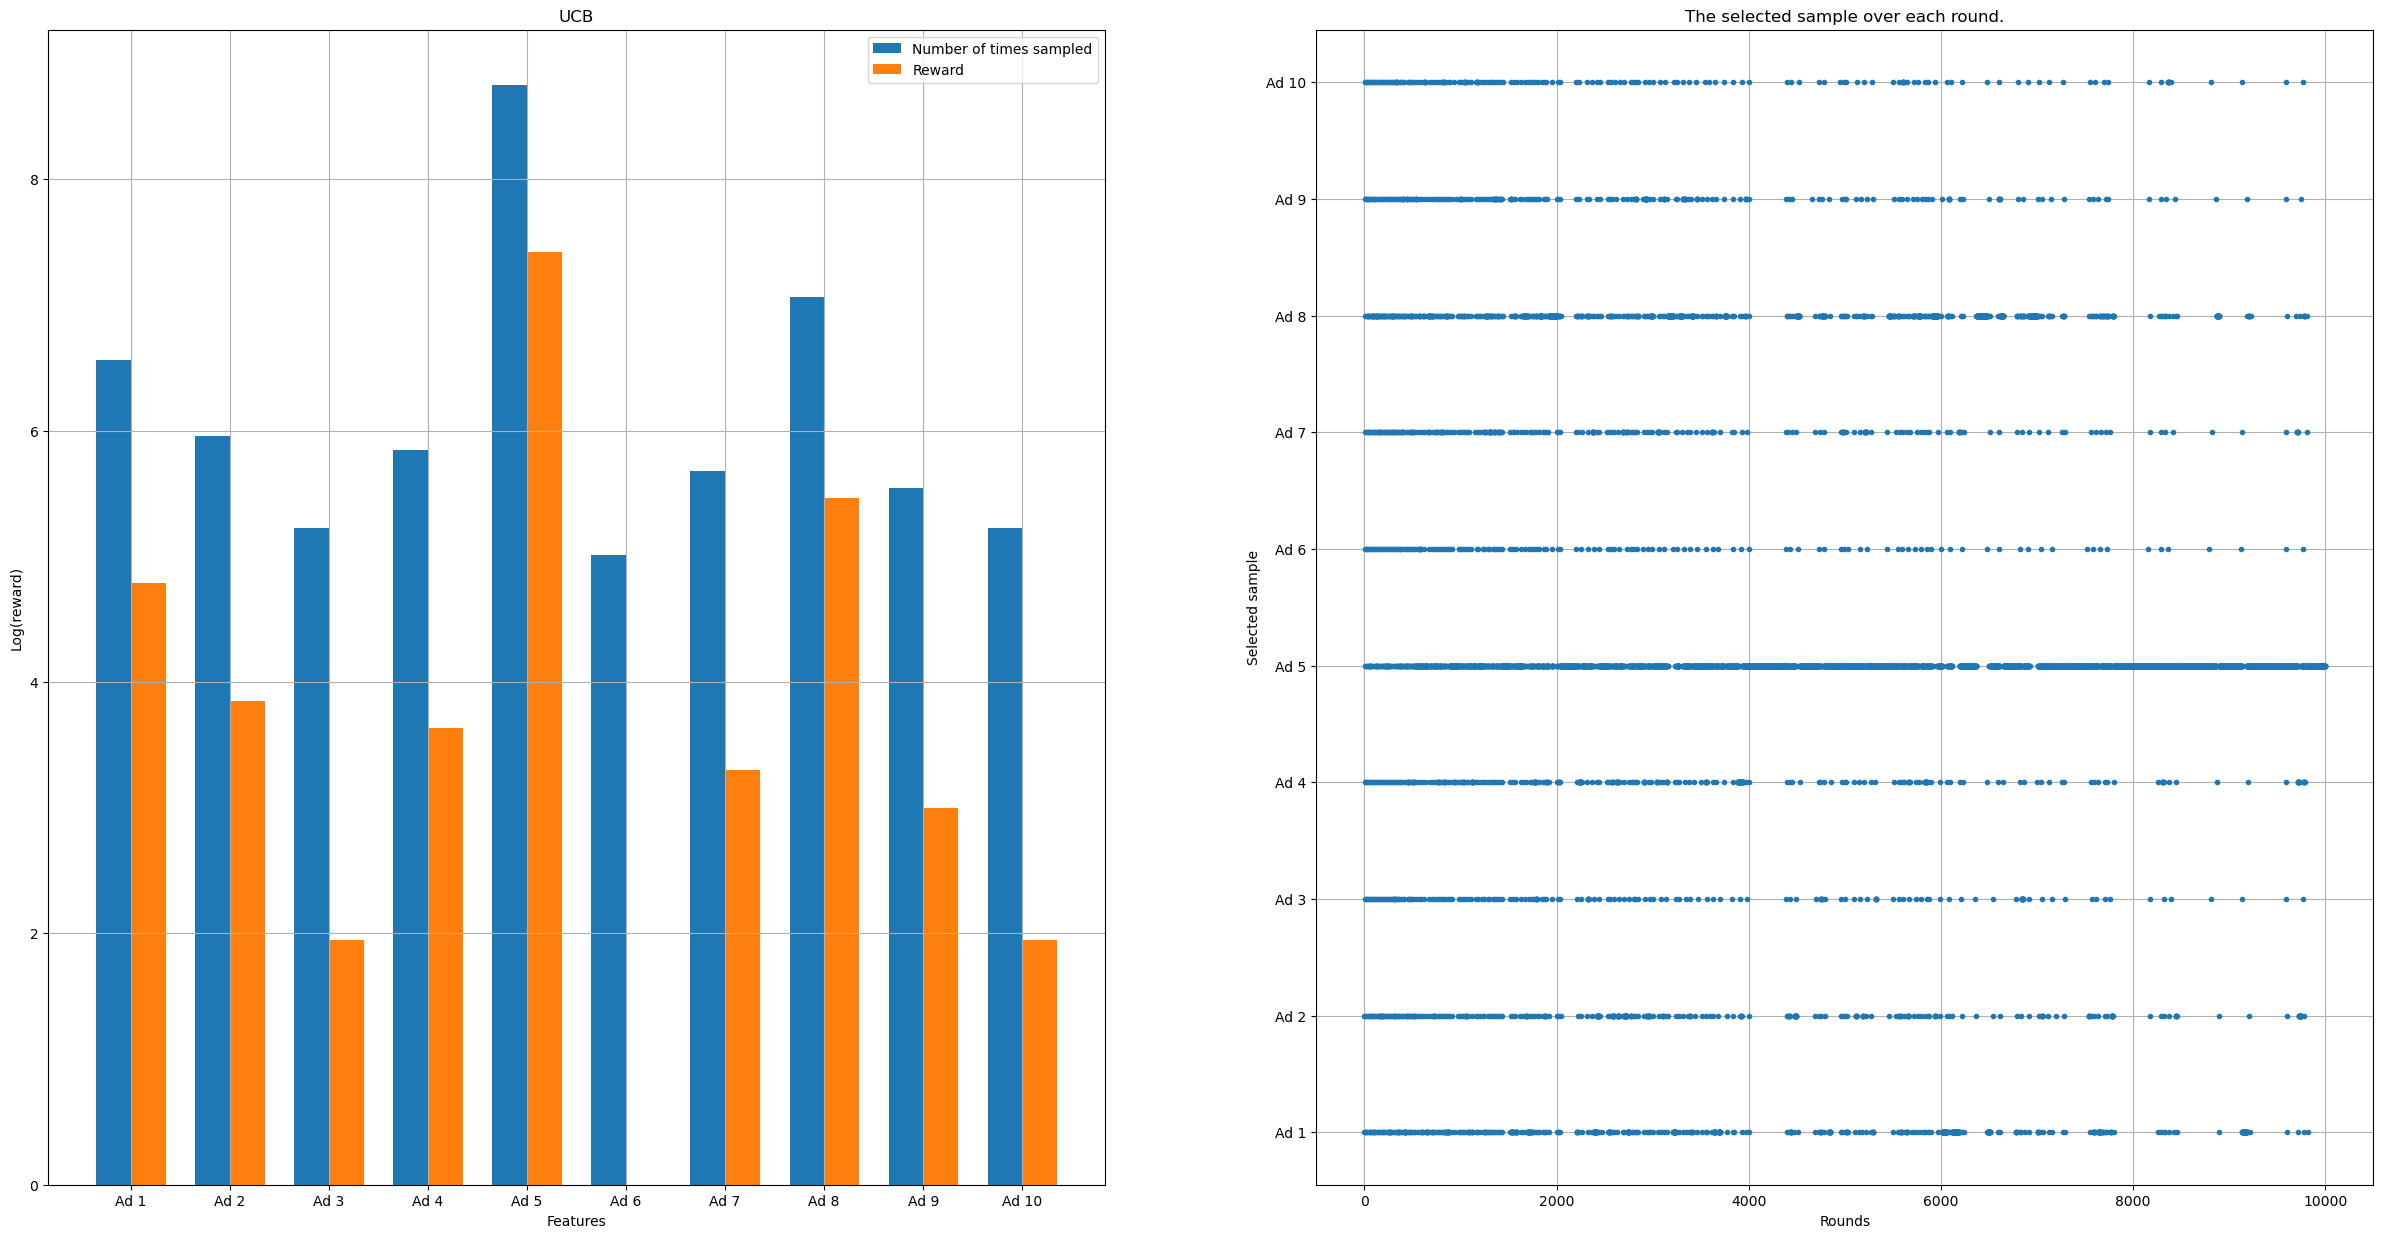

In [62]:
ucb_data = thompson.UCB(data)
thompson.plot(ucb_data)